In [ ]:
#  importing libraries and necessary functions
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

 To load data drag and drop the data file into the "notebook files", then the following code will execute
 The target file is ```calories.csv``` and the fetures are ```User_ID	Gender	Age	Height	Weight	Duration	Heart_Rate	Body_Temp ``` which are stored in ```exercise``` and shows if you practice with the given parameters in ```exercise``` how much energy you burn in calories

## Loading data

In [ ]:
# loading data, the target data here is calories.csv and features are
#  exercise
calories = pd.read_csv('calories.csv')
exercise = pd.read_csv('exercise.csv')

We can connect the two files using the user_id but the data is ordered and combining them is not ncessary

## Exploratory Data Analysis

In [ ]:
calories.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


Notice that ```height``` is measured in ```cm```

In [ ]:
exercise.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


The id column is not useful for training and is redundant, we have row's numbers

In [ ]:
# making a feature matrix
features = exercise.drop(['User_ID'], axis=1)

# making the final target matrix
target = calories.drop(['User_ID'], axis=1)

In [ ]:
# checking types to make sure everything is good for the rest of the analysis
print(type(target))

<class 'pandas.core.frame.DataFrame'>


The colums's names are capitalized. To make our lives easier, let's make it with lower cases

In [ ]:
# making features's titles lower case
features.columns = features.columns.str.lower()

# making target's titles lower case
target.columns = target.columns.str.lower()

one feature which might be useful is ```bmi```, we can make it by combining previous features

In [ ]:
# height accoriding to SI unit
features['height'] = features['height']/100

In [ ]:
# defining BMI
features['bmi'] = features['weight']/(features['height']**2)

In [ ]:
features.head()

,gender,age,height,weight,duration,heart_rate,body_temp,bmi
0,male,68,1.90,94.0,29.0,105.0,40.8,26.038781
1,female,20,1.66,60.0,14.0,94.0,40.3,21.773842
2,male,69,1.79,79.0,5.0,88.0,38.7,24.655910
3,female,34,1.79,71.0,13.0,100.0,40.5,22.159109
4,female,27,1.54,58.0,10.0,81.0,39.8,24.456063


Let's see if the data is clear

In [ ]:
features.isnull().sum()

,0
gender,0
age,0
height,0
weight,0
duration,0
heart_rate,0
body_temp,0
bmi,0


In [ ]:
target.isnull().sum()

,0
calories,0


One good practice is looking at the data description. Here we get a good understanding of outliers too. Also the scale of data is really different for ``` body_temp, heart_rate, BMI```. This can cause a problem and we shoul cosider scaling the data

In [ ]:
data = pd.merge(calories, exercise, on='User_ID')
target.columns = target.columns.str.lower()
data.columns = data.columns.str.lower()
data.describe()

,user_id,calories,age,height,weight,duration,heart_rate,body_temp
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,89.539533,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453
std,2.872851e+06,62.456978,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230
min,1.000116e+07,1.000000,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000
25%,1.247419e+07,35.000000,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000
50%,1.499728e+07,79.000000,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000
75%,1.744928e+07,138.000000,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000
max,1.999965e+07,314.000000,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000


Another good practice is looking at the histogram of data. The best data have gaussian-like histogram. Here I checked and even with logarithm we can not axhieve that. Still we have good and clean data

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'height'}>,
        <Axes: title={'center': 'weight'}>],
       [<Axes: title={'center': 'duration'}>,
        <Axes: title={'center': 'heart_rate'}>,
        <Axes: title={'center': 'body_temp'}>],
       [<Axes: title={'center': 'bmi'}>, <Axes: >, <Axes: >]],
      dtype=object)

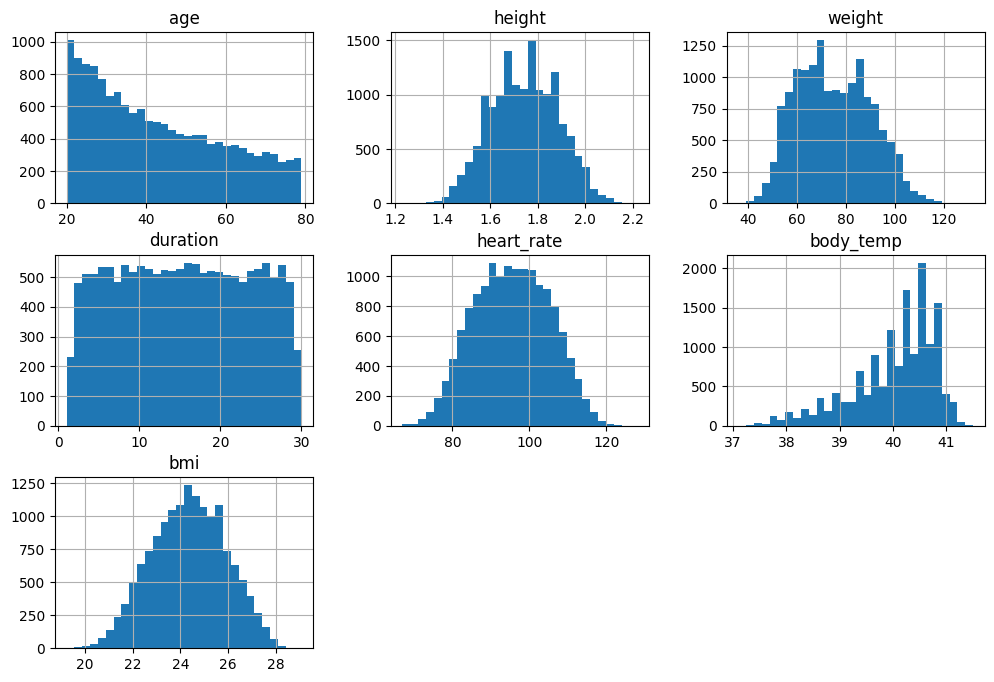

In [ ]:
features.hist(bins=30,figsize=(12, 8))

<Axes: ylabel='Count'>

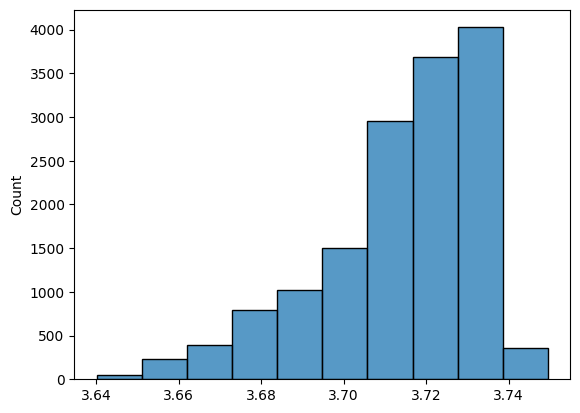

In [ ]:
# checking if logarithm will give us gaussian-like data
Y = np.log1p(features.body_temp.values)
sns.histplot(Y, bins=10)

Box plot for better understanding about outliers and scales

[Text(1, 0, 'age'),
 Text(2, 0, 'weight'),
 Text(3, 0, 'duration'),
 Text(4, 0, 'heart_rate')]

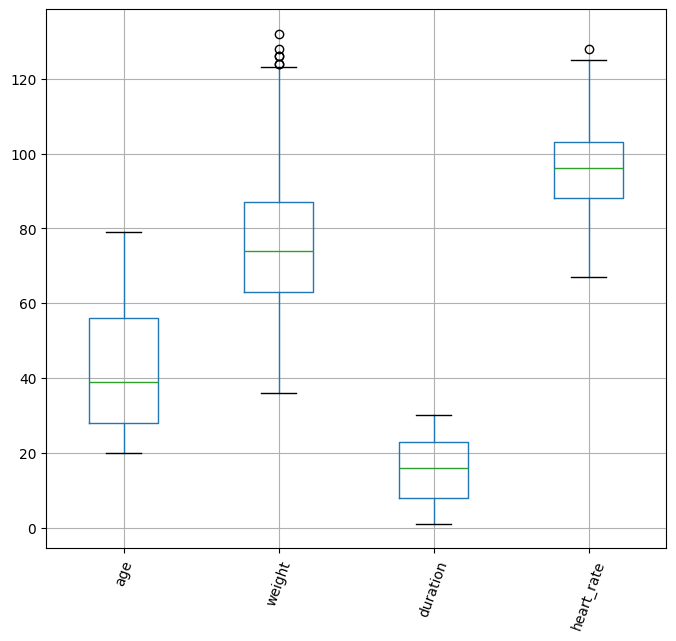

In [ ]:
data['bmi'] = data['weight']/(data['height']**2)
ax=data.drop(["user_id", "calories", "bmi", "body_temp", "height" ],axis=1).boxplot(figsize = [8, 7])
ax.set_xticklabels(ax.get_xticklabels(),rotation=70)

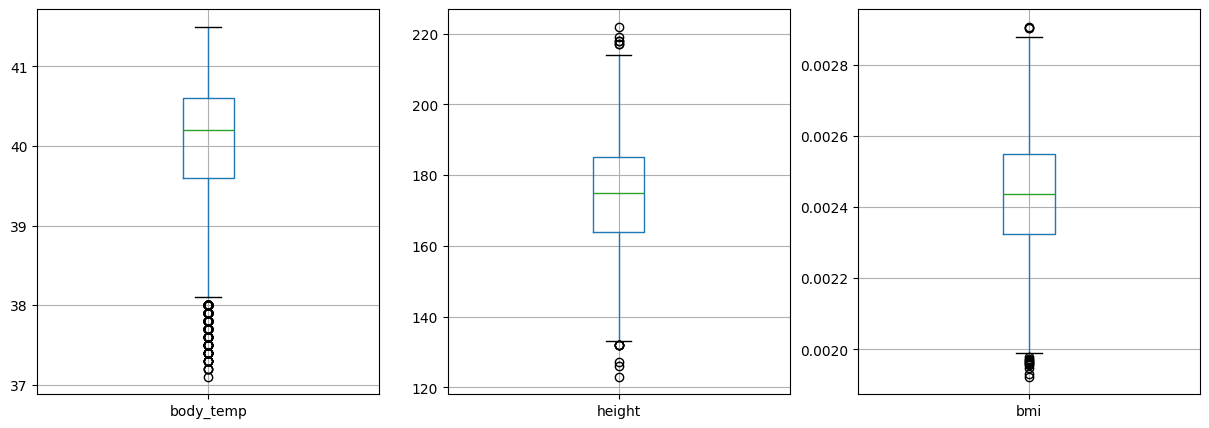

In [ ]:
# plotting data with small scale separatly
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
ax=data[ ["body_temp"] ].boxplot(ax=axes[0],figsize = [8, 7])
ax=data[ ["height"]    ].boxplot(ax=axes[1],figsize = [8, 7])
ax=data[ ["bmi"]       ].boxplot(ax=axes[2],figsize = [8, 7])

In [ ]:
data.columns

Index(['user_id', 'calories', 'gender', 'age', 'height', 'weight', 'duration',
       'heart_rate', 'body_temp', 'bmi'],
      dtype='object')

[Text(0.5, 0, 'age'),
 Text(1.5, 0, 'height'),
 Text(2.5, 0, 'weight'),
 Text(3.5, 0, 'duration'),
 Text(4.5, 0, 'heart_rate'),
 Text(5.5, 0, 'body_temp'),
 Text(6.5, 0, 'bmi'),
 Text(7.5, 0, 'calories')]

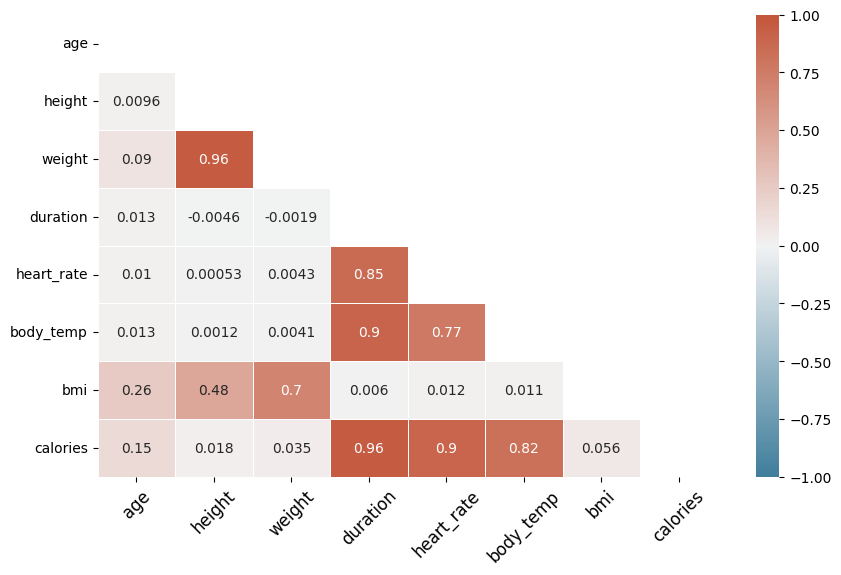

In [ ]:
# numeric featues  are
numeric = [ 'age', 'height', 'weight', 'duration','heart_rate',
           'body_temp', 'bmi']

# target colums or y is:
target_val = ['calories']

# all the numeric data together:
data_numeric = data[numeric+target_val]

# finding data corrlation and masking redundand output
plt.figure( figsize=(10, 6))
mask = np.triu( np.ones_like(data_numeric.corr(numeric_only=True), dtype=bool))
cmap = sns.diverging_palette(230, 20 , as_cmap=True)

# presenting data corrilation with heatmap
heatmap = sns.heatmap(
    data_numeric.corr(numeric_only=True),
    mask=mask,
    cmap=cmap,
    vmin=-1,
    vmax=1,
    annot=True,
    linewidth=0.5
)

# rotating x titles to read it easier
heatmap.set_xticklabels(heatmap.get_yticklabels(), rotation = 45, fontsize = 12)

As expected, duration of exercise has direct impact on the calories we burn, also with exercised that increase hearrate and boy_temp, we burn more energy.
Height, weight and bmi does not have any effect here. It is good news. If you are fat you burn the same amount of energy as a thin person

From here on, we use feature and target matrix

In [ ]:
features.shape

(15000, 8)

In [ ]:
features.head()

,gender,age,height,weight,duration,heart_rate,body_temp,bmi
0,male,68,1.90,94.0,29.0,105.0,40.8,26.038781
1,female,20,1.66,60.0,14.0,94.0,40.3,21.773842
2,male,69,1.79,79.0,5.0,88.0,38.7,24.655910
3,female,34,1.79,71.0,13.0,100.0,40.5,22.159109
4,female,27,1.54,58.0,10.0,81.0,39.8,24.456063


In [ ]:
target.shape

(15000, 1)

In [ ]:
target.head()

,calories
0,231.0
1,66.0
2,26.0
3,71.0
4,35.0


## Preparing data for training

In [ ]:
# importing functions for data preparation and training
from sklearn.model_selection    import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.preprocessing      import StandardScaler

In [ ]:
# split features and target in training, test and validation sets
features_full_train, features_test, target_full_train, target_test = train_test_split(
                                                           features,
                                                           target,
                                                           test_size=0.2,
                                                           random_state=42)
features_train, features_val, target_train, target_val = train_test_split(
                                                           features_full_train,
                                                           target_full_train,
                                                           test_size=0.25,
                                                           random_state=42)

In [ ]:
# checking one more time if the type of features and targets are right
print(type(target_train), type(target_full_train), type(target_val))
target_val = pd.DataFrame(target_val)
print(type(target_train), type(target_full_train), type(target_val))
print(target_val.shape)

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'>
(3000, 1)


In [ ]:
# checking one more time if the dimension of features and targets are right
print(features_full_train.shape )
print(features_test.shape)
print(target_full_train.shape)
print(target_test.shape)
print(features_train.shape, features_val.shape, target_train.shape, target_val.shape )

(12000, 8)
(3000, 8)
(12000, 1)
(3000, 1)
(9000, 8) (3000, 8) (9000, 1) (3000, 1)


We have a categorical feature : ```age```
We need to use one-hot encoding to make feature matrices ready for training

In [ ]:
dv = DictVectorizer(sparse=False)
## one-hot endocding for training data
train_dicts  = features_train.to_dict(orient='records')
X_train      = dv.fit_transform(train_dicts)

## one-hot encoding for validation data
val_dicts  = features_val.to_dict(orient='records')
X_val      = dv.transform(val_dicts)

## one-hot encoding for test data
test_dicts  = features_test.to_dict(orient='records')
X_test      = dv.transform(val_dicts)

In [ ]:
# checking one more time if the dimension of features and targets are right
print(X_train.shape, X_val.shape)
print(target_train.shape, target_val.shape)

(9000, 9) (3000, 9)
(9000, 1) (3000, 1)


In [ ]:
# checking one more time if the type of features and targets are right

print(type(features_val))
print(type(target_val))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [ ]:
# checking the form of our features with dictionaries made by to_dict
train_dicts[0]

{'gender': 'male',
 'age': 26,
 'height': 2.11,
 'weight': 113.0,
 'duration': 15.0,
 'heart_rate': 103.0,
 'body_temp': 40.1,
 'bmi': 25.3812807439186}

In [ ]:
X_train[0]
titles = [  'age',
            'bmi',
            'body_temp',
            'duration',
            'female',
            'male',
            'heart_rate',
            'height',
            'weight']

After encoding data, we need to scale features because some algorithms do not work well with features who does not have same scale

In [ ]:
scaler = StandardScaler(copy=False, with_mean=True, with_std=True)
scaled_X_train  = scaler.fit_transform(X_train)
scaled_X_test   = scaler.transform(     X_test)
scaled_X_val    = scaler.transform(      X_val)

In [ ]:
print(X_train.shape, X_val.shape)
print(target_train.shape, target_val.shape)

(9000, 9) (3000, 9)
(9000, 1) (3000, 1)


We can check if the scaling indeed had our desired output

0.993667042801215
0.9927208288541438
0.9842228992628407
0.9867606785514667
0.9999339959442967
0.9999339959442965
0.9879657159454981
1.0071888212200588
0.9995125839300538


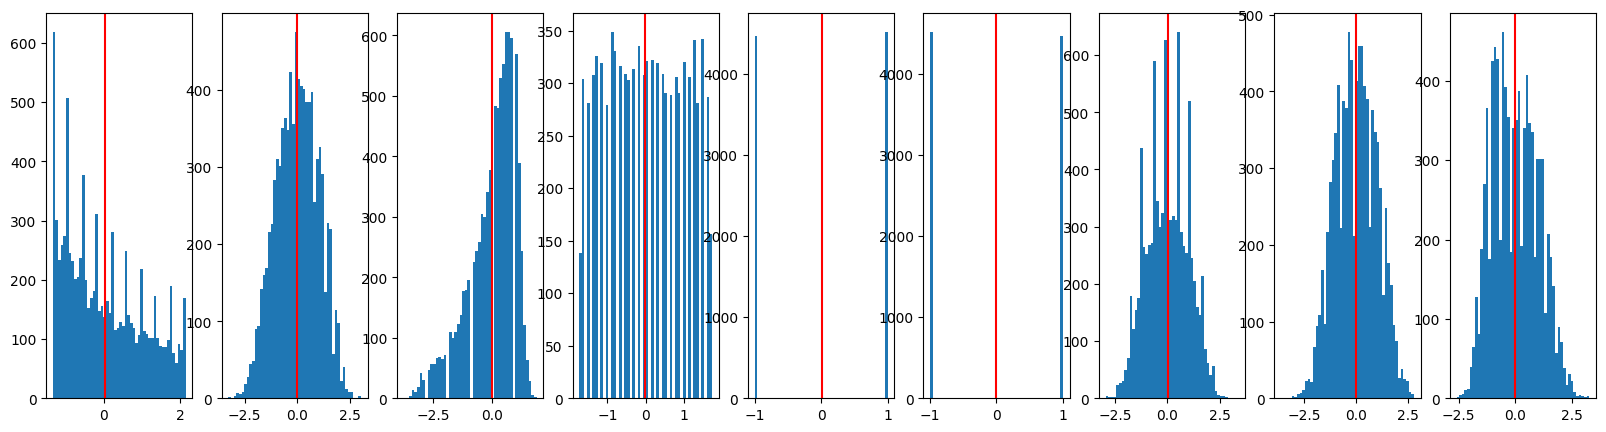

In [ ]:
# creating subplots for scaled featues for training and test
fig, axs = plt.subplots(1, scaled_X_train.shape[1], figsize=(20, 5))

for idx in  range(scaled_X_train.shape[1]):
    # histogram of scaled data
    axs[idx].hist(scaled_X_train[:, idx], bins=50)

    # check if scaled data indeed had mean around zero
    axs[idx].axvline(scaled_X_test[:, idx].mean(), color='red')
    print(scaled_X_test[:, idx].std())
plt.show()

<Axes: ylabel='Count'>

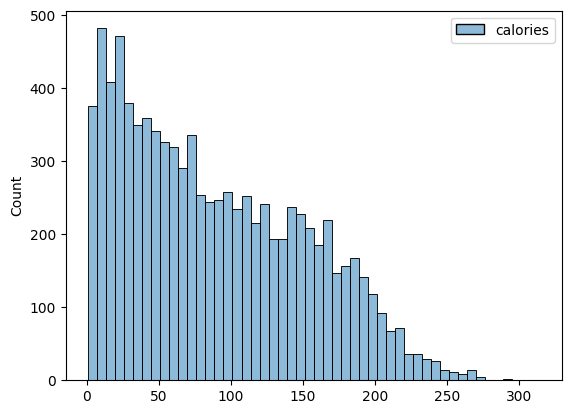

In [ ]:
# notice that we do not scale target
sns.histplot(target_train, bins=50)


Text(0.5, 1.0, 'Distribution of log+1 of calories burnt')

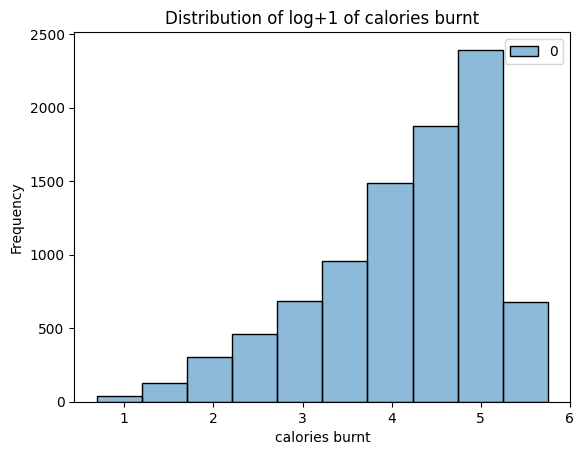

In [ ]:
# log for the target does not create a gaussian-like diagram.
# so we use target as it is
target_logp1 = np.log1p(target_train.values)
sns.histplot(target_logp1, bins=10)
plt.ylabel('Frequency')
plt.xlabel('calories burnt')
plt.title('Distribution of log+1 of calories burnt')

In [ ]:
scaled_X_train

array([[-0.97778216,  0.66675626,  0.10108703, ...,  0.79282705,
         2.57669788,  2.53835033],
       [-0.62430304, -0.80222517,  0.99742519, ...,  1.73344767,
         1.30913848,  0.73927804],
       [-0.21191073,  0.51838548,  0.61328026, ...,  0.06123324,
        -2.35269979, -1.65948501],
       ...,
       [ 0.31830795,  0.72319075, -0.53915452, ..., -0.98390078,
         0.04157908,  0.20621959],
       [ 0.31830795, -1.06620428,  0.86937688, ...,  1.10636726,
        -0.45136069, -0.72663271],
       [-0.32973711,  1.17527557,  1.1254735 , ...,  0.79282705,
        -0.52178066, -0.12694195]])

## Training the model with various types of Regression

### Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(scaled_X_train, target_train)

LinearRegression()

Checking the result of regression with ```RMSE```

In [ ]:
from sklearn.metrics import root_mean_squared_error

y_pred = lin_reg.predict(scaled_X_val)
root_mean_squared_error(target_val, y_pred)

10.818214975901464

### Polynomial Regression

I do not know if data indeed fits with ```x``` or $x^2$ or $x^3$ ... . So I create these featues and add them to the feature matrix and repeat the linear Regression with these new features. Hopefully I can achieve better ```RMSE``` with this method. Also I do not want the model to overfit. So I try with different polynomial degree and chose the best one at the end.
Fortunatly sklearn has built-in functions to do these processes for us

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

for model_degree in [1,2,3,4,5]:
    print('model degree %d'% model_degree)
    poly_features = PolynomialFeatures(degree=model_degree, include_bias=False)
    X_poly = poly_features.fit_transform(scaled_X_train)

    lin_reg.fit(X_poly, target_train)
    lin_reg.intercept_, lin_reg.coef_

    X_poly_val = poly_features.fit_transform(scaled_X_val)

    y_pred = lin_reg.predict(X_poly_val)
    print(root_mean_squared_error(target_val, y_pred))
    y_pred = lin_reg.predict(X_poly)
    print(root_mean_squared_error(target_train, y_pred))
    print("\n")

model degree 1
10.818214975901464
11.030353274311612


model degree 2
2.665187156681847
2.654681143914613


model degree 3
0.2938915623969441
0.28803079755041067


model degree 4
0.3106745893648952
0.28412195254006156


model degree 5
1.4831130768387242
0.27280971334073095




As we can see with degree 5 there is overfit and the model does not perform well with the validation data. Other degrees does not overfit but they can do better as the polynomial degree goes up. The best degree here is 4

### Random Forest

We learned in the excercise for week 6 that decision trees can also be used for Regression. So let's use it for our problem here

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
# ==============================================================================
# Training
# ==============================================================================

rf = RandomForestRegressor(n_estimators=10, random_state=1, n_jobs=-1)
rf.fit(scaled_X_train, target_train)
y_pred = rf.predict(scaled_X_val)


# ==============================================================================
# measuring the model performance
# ==============================================================================
rmse = root_mean_squared_error(target_val, y_pred)
print("rmse = %.3f" % rmse)

y_pred = rf.predict(scaled_X_train)
print(root_mean_squared_error(target_train, y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


rmse = 3.795
1.7190132828651055



###optimizing the model
We need to optimize our Random Forest for different parameters

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


n_estimators= 10 , rmse = 3.795


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


n_estimators= 30 , rmse = 3.401


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


n_estimators= 51 , rmse = 3.298


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


n_estimators= 71 , rmse = 3.285


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


n_estimators= 92 , rmse = 3.265


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


n_estimators= 112 , rmse = 3.247


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


n_estimators= 133 , rmse = 3.244


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


n_estimators= 153 , rmse = 3.237


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


n_estimators= 174 , rmse = 3.222


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


n_estimators= 194 , rmse = 3.211


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


n_estimators= 215 , rmse = 3.216


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


n_estimators= 235 , rmse = 3.209


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


n_estimators= 256 , rmse = 3.210


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


n_estimators= 276 , rmse = 3.207


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


n_estimators= 297 , rmse = 3.205


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


n_estimators= 317 , rmse = 3.206


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


n_estimators= 338 , rmse = 3.206


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


n_estimators= 358 , rmse = 3.210


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


n_estimators= 379 , rmse = 3.211


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


n_estimators= 400 , rmse = 3.209


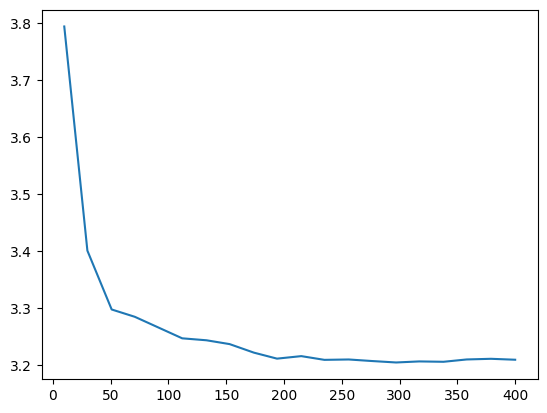

In [ ]:
# ==============================================================================
# Optimizing the forest for number of estimators
# ==============================================================================

estimators_list = np.linspace(10, 400, 20, dtype=int)
scores = []
for num in estimators_list:
    rf = RandomForestRegressor(n_estimators=num, random_state=1, n_jobs=-1)
    rf.fit(scaled_X_train, target_train)
    y_pred = rf.predict(scaled_X_val)

    rmse = root_mean_squared_error(target_val, y_pred)
    scores.append((rmse, num))
    print("n_estimators= %d , rmse = %.3f" % (num, rmse))

scores = pd.DataFrame(scores, columns=['rmse', 'n_estimators'])
plt.plot(scores['n_estimators'], scores.rmse)

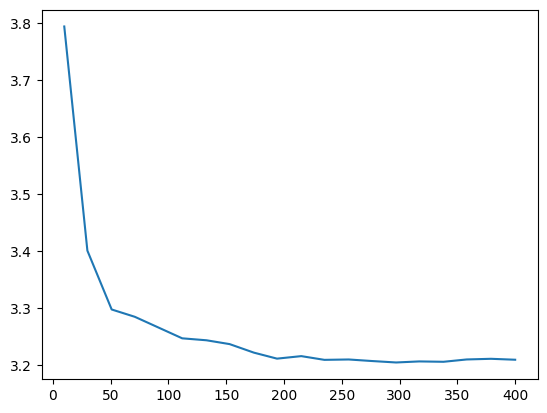

In [ ]:
scores = pd.DataFrame(scores, columns=['rmse', 'n_estimators'])
plt.plot(scores['n_estimators'], scores.rmse)

As we can see, after 250 there is no meaningful change. To continue optimization, in the area with constant performance for n_estimators, we average over RMSE with different ```max-depth```

In [ ]:
estimators_list = np.linspace(250, 400, 11, dtype=int)

avg_scores = []
for md in [10, 15, 20, 25]:
  scores = np.array([])
  for num in estimators_list:
        rf = RandomForestRegressor(n_estimators=num, random_state=1, n_jobs=-1
                                                   ,max_depth=md)
        rf.fit(scaled_X_train, target_train)
        y_pred = rf.predict(scaled_X_val)

        rmse = root_mean_squared_error(target_val, y_pred)
        scores=np.append(scores,rmse)
        # print("n_estimators= %d , rmse = %.3f" % (num, rmse))
  print("max_depth=%d, mean_rmse=%.3f" % (md, np.average(scores)))
  avg_scores.append((np.average(scores), md))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

max_depth=10, mean_rmse=3.667


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

max_depth=15, mean_rmse=3.210


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

max_depth=20, mean_rmse=3.206


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

max_depth=25, mean_rmse=3.207


In [ ]:
avg_scores

[(3.666537705323385, 10),
 (3.210036089783955, 15),
 (3.2057014411988662, 20),
 (3.207335629459261, 25)]

The best ```max_depth``` is 20.
Now with the best parameters we found, we can find the importanc of features

In [ ]:
# Training the model with parameters given above
rf = RandomForestRegressor(n_estimators=200, random_state=1, n_jobs=-1
                                          ,max_depth=20)

rf.fit(scaled_X_train, target_train)

feature_importance = rf.feature_importances_
feature_names = dv.get_feature_names_out()

feature_importance_df = pd.DataFrame({'feature': feature_names,
                                      'importance': feature_importance})


feature_importance_df = feature_importance_df.sort_values(by='importance',
                                                          ascending=False)

feature_importance_df

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


,feature,importance
3,duration,0.913079
6,heart_rate,0.048249
0,age,0.026454
5,gender=male,0.003264
4,gender=female,0.003175
8,weight,0.002868
7,height,0.001242
1,bmi,0.001189
2,body_temp,0.000480


As we expected, the most imporant feature is ```duration```. Also with long durations and higher hear_rate we burn more energy

### XGboost model

For xgboost model we need to train and optimize for $\eta$. Lets do it at the same time

In [ ]:
!pip install xgboost

In [ ]:
import xgboost as xgb

In [ ]:
scores = []
for ETA in [0.1, 0.3]:

  # Creating DMatrix for train and validation
  dtrain = xgb.DMatrix(scaled_X_train, label=target_train, feature_names=dv.feature_names_)
  dval   = xgb.DMatrix(scaled_X_val,   label=target_val,   feature_names=dv.feature_names_)

  # Creating a watchlist
  watchlist = [(dtrain, 'train'), (dval, 'val')]

  # defining parameters for booster
  xgb_params = {
    'eta': ETA,
    'max_depth': 20,
    'min_child_weight': 1,

    'objective': 'reg:squarederror',
    'nthread': 8,

    'seed': 1,
    'verbosity': 1}

  # training
  model = xgb.train(xgb_params, dtrain, num_boost_round=100,
                        evals=watchlist, verbose_eval=10)

  # RMSE
  y_pred = model.predict(dval)
  rmse = root_mean_squared_error(target_val, y_pred)

  scores.append((rmse, ETA))

df_scores = pd.DataFrame(scores, columns=['RMSE', 'eta'])

In [ ]:
# prompt: group df_scores by eta and for each value of eta show the average

df_scores.groupby('eta')['RMSE'].mean()

,RMSE
eta,
0.1,2.423870
0.3,2.976037


Comparing the ```RMSE``` for this data set we can see that the best model is ```polynomial regression``` So for the rest of the progect we use this as the main model. The final model will be as follows

In [78]:
# ==============================================================================
# # importing libraries functions for data preparation and training
# ==============================================================================

import pandas as pd
import numpy as np

from sklearn.model_selection    import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.preprocessing      import StandardScaler
from sklearn.metrics            import root_mean_squared_error
from sklearn.preprocessing      import PolynomialFeatures
from sklearn.linear_model       import LinearRegression


# loading data, the target data here is calories.csv and features are
#  exercise
calories = pd.read_csv('calories.csv')
exercise = pd.read_csv('exercise.csv')


# ==============================================================================
# Preparing data for Trining
# ==============================================================================

# making a feature matrix and final target matrix
features = exercise.drop(['User_ID'], axis=1)
target = calories.drop(['User_ID'], axis=1)

# making features's and target's  titles lower case
features.columns = features.columns.str.lower()
target.columns = target.columns.str.lower()

# height accoriding to SI unit
features['height'] = features['height']/100

# defining BMI
features['bmi'] = features['weight']/(features['height']**2)


# split features and target in training, test and validation sets
features_full_train, features_test, target_full_train, target_test = train_test_split(
                                                           features,
                                                           target,
                                                           test_size=0.2,
                                                           random_state=42)
features_train, features_val, target_train, target_val = train_test_split(
                                                           features_full_train,
                                                           target_full_train,
                                                           test_size=0.25,
                                                           random_state=42)
# ==============================================================================
# One-Hot encoding
# ==============================================================================

dv = DictVectorizer(sparse=False)
## one-hot endocding for training data
train_dicts  = features_train.to_dict(orient='records')
X_train      = dv.fit_transform(train_dicts)

## one-hot encoding for validation data
val_dicts  = features_val.to_dict(orient='records')
X_val      = dv.transform(val_dicts)

## one-hot encoding for test data
test_dicts  = features_test.to_dict(orient='records')
X_test      = dv.transform(val_dicts)

# ==============================================================================
# Scaling
# ==============================================================================

scaler = StandardScaler(copy=False, with_mean=True, with_std=True)
scaled_X_train  = scaler.fit_transform(X_train)
scaled_X_test   = scaler.transform(     X_test)
scaled_X_val    = scaler.transform(      X_val)

# saving mean and std for
mean_train = X_train.mean(axis=0)
std_train  = X_train.std(axis=0)

# ==============================================================================
# Training
# ==============================================================================

lin_reg = LinearRegression()

print('model degree %d'% model_degree)
poly_features = PolynomialFeatures(degree=4, include_bias=False)
X_poly = poly_features.fit_transform(scaled_X_train)

lin_reg.fit(X_poly, target_train)
lin_reg.intercept_, lin_reg.coef_

X_poly_val = poly_features.fit_transform(scaled_X_val)

y_pred = lin_reg.predict(X_poly_val)
print(root_mean_squared_error(target_val, y_pred))
y_pred = lin_reg.predict(X_poly)
print(root_mean_squared_error(target_train, y_pred))
print("\n")

model degree 5
0.3106745893648952
0.28412195254006156




Storing mean values and std for furthure use

In [77]:
mean_train = X_train.mean(axis=0)
std_train  = X_train.std(axis=0)

In [79]:
mean_train

array([-8.03369716e-17, -1.23359372e-13,  1.44836192e-13, -6.94012749e-17,
       -3.78215977e-17, -2.55104579e-17, -1.56664805e-17, -5.96060238e-15,
        1.00074270e-17])

In [80]:
std_train

array([1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [ ]:
# one of the prediction
y_pred[0,0]

91.1463623046875

Code for saving the bin file

In [ ]:
import pickle

Saving the bin file using with

In [ ]:
with open(output_file, 'wb') as f_out:
    pickle.dump((dv, lin_reg), f_out)

In [ ]:
model_file = "calories.bin"
with open(model_file, 'rb') as f_in:
    dv, model = pickle.load(f_in)

An instance of the data for testing

In [ ]:
exc = {
 'gender': 'male',
 'age': 26,
 'height': 2.11,
 'weight': 113.0,
 'duration': 15.0,
 'heart_rate': 103.0,
 'body_temp': 40.1,
 'bmi': 25.3812807439186}

In [71]:
# turn the exc into a feature matrix
X = dv.transform([exc])
X

array([[ 26.        ,  25.38128074,  40.1       ,  15.        ,
          0.        ,   1.        , 103.        ,   2.11      ,
        113.        ]])

titles in order are :

```
# titles = [  'age',
            'bmi',
            'body_temp',
            'duration',
            'female',
            'male',
            'heart_rate',
            'height',
            'weight']
```



Testing the model with this instance

In [72]:
X_scaled = (X - mean_train)/std_train

In [74]:
poly_features_X = PolynomialFeatures(degree=4, include_bias=False)
X_poly = poly_features.fit_transform(X_scaled)
model.predict(X_poly)[0,0]

-1.1560438632290288e+16

My model unfortunatly gives a negative value. If you have any idea on how to fix this, let me know in the peer review comments